In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Getting to Know Your Data
First let's load in the training data and veiw the first 5 rows. This will tell us what variables the dataset has and what we should start thinking about. 

In [60]:
X = pd.read_csv('../data/train.csv')
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Right off the bat we see that the column that will be the most important is the survived column. This is because we are trying to make a model that will tell us if the person survived the sinking of the Titanic. Let's visualize somethings about the data conditioning on whether the person survived or not.  

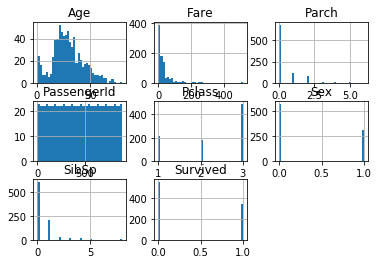

In [68]:
X_s=X.loc[X['Survived']==1].copy()
X_d=X.loc[X['Survived']==0].copy()
X.hist(bins=40)
plt.show()

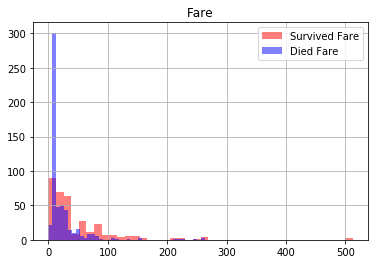

In [69]:
ax1=plt.subplot(1,1,1)
X_s.hist(column="Fare",bins=40, ax=ax1, label="Survived Fare", color="red", alpha=0.5)
X_d.hist(column="Fare",bins=40,ax=ax1, label="Died Fare",color="blue", alpha=0.5)
plt.legend()
plt.show()


So it does seem that many of the people that died had lower fare, but it doesn't seem that many of the people that survived had much hire fare. I would not consider this variable to be enough to make the classifier between someone died vs. survived.

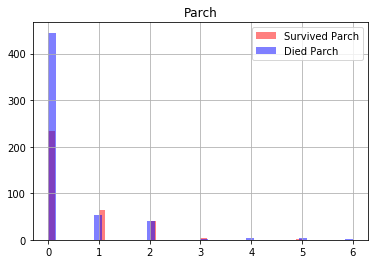

In [70]:
ax1=plt.subplot(1,1,1)
X_s.hist(column="Parch",bins=40, ax=ax1, label="Survived Parch", color="red", alpha=0.5)
X_d.hist(column="Parch",bins=40,ax=ax1, label="Died Parch",color="blue", alpha=0.5)
plt.legend()
plt.show()

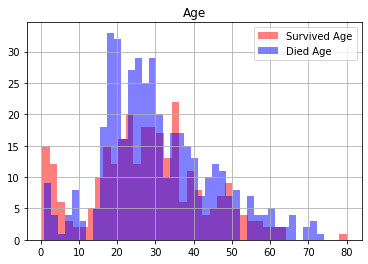

In [71]:
ax1=plt.subplot(1,1,1)
X_s.hist(column="Age",bins=40, ax=ax1, label="Survived Age", color="red", alpha=0.5)
X_d.hist(column="Age",bins=40,ax=ax1, label="Died Age",color="blue", alpha=0.5)
plt.legend()
plt.show()

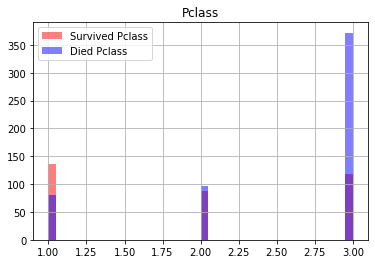

In [72]:
ax1=plt.subplot(1,1,1)
X_s.hist(column="Pclass",bins=40, ax=ax1, label="Survived Pclass", color="red", alpha=0.5)
X_d.hist(column="Pclass",bins=40,ax=ax1, label="Died Pclass",color="blue", alpha=0.5)
plt.legend()
plt.show()

Since the Male and Female coding are not integers we can see that they do not have any sort of bar graph. Let's replace "male" with 0 and "female" with 1.

In [73]:
X['Sex'] = X['Sex'].replace('male',0).copy()
X['Sex'] = X['Sex'].replace('female',1).copy()


In [74]:
X_s['Sex'] = X_s['Sex'].replace('male',0).copy()
X_s['Sex'] = X_s['Sex'].replace('female',1).copy()
X_d['Sex'] = X_d['Sex'].replace('male',0).copy()
X_d['Sex'] = X_d['Sex'].replace('female',1).copy()

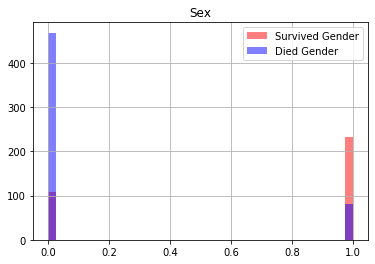

In [76]:
ax1=plt.subplot(1,1,1)
X_s.hist(column="Sex",bins=40, ax=ax1, label="Survived Gender", color="red", alpha=0.5)
X_d.hist(column="Sex",bins=40,ax=ax1, label="Died Gender",color="blue", alpha=0.5)
plt.legend()
plt.show()

In [78]:
emb_vals=X['Embarked'].drop_duplicates()
print(emb_vals)

0       S
1       C
5       Q
61    NaN
Name: Embarked, dtype: object


You can see we have NaN values in the dataset. This should have been the first thing I checked. 

In [79]:
mask = X.isna().any(axis=1)
X.loc[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",0,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",0,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",1,14.0,0,0,350406,7.8542,NaN,S


This shows that the cabin column has a lot of NaN. Let's change those to unknown.

In [80]:
X['Cabin']=X['Cabin'].fillna("unknown").copy()

In [81]:
mask = X.isna().any(axis=1)
X.loc[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,unknown,Q
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,unknown,S
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,unknown,C
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,unknown,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,unknown,Q
29,30,0,3,"Todoroff, Mr. Lalio",0,NaN,0,0,349216,7.8958,unknown,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",1,NaN,0,0,335677,7.7500,unknown,Q
36,37,1,3,"Mamee, Mr. Hanna",0,NaN,0,0,2677,7.2292,unknown,C
42,43,0,3,"Kraeff, Mr. Theodor",0,NaN,0,0,349253,7.8958,unknown,C


So this shows that a lot of peoples' ages are missing. This will be very difficult for a numerical method to use this in the feature. This is espeically unfortunate since the age is something you would expect to be important because of the saying save the women and the children. Also, age is continuous variable making it well suited for methods that involve fitting sending the data to a space where they are separted. As an experiment when we run the models we will change these NaNs to different numbers that might help the models fit the data. Something like -99 may tell the something like a random tree to bin people whose ages were not recorded a specific designation. But in future runs it might be worth dropping all people with ages unknown. But let's first continue to recode categorical data as numbers. You can see in the embarked column that it might be worth changing C to 1, S to 2, Q to 3, and NaN to 4. 

In [82]:
X['Embarked']=X['Embarked'].replace("C",1)
X['Embarked']=X['Embarked'].replace("S",2)
X['Embarked']=X['Embarked'].replace("Q",3)
X['Embarked']=X['Embarked'].fillna(4)

In [83]:
mask = X.isna().any(axis=1)
X.loc[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,unknown,3.0
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,unknown,2.0
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,unknown,1.0
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,unknown,1.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,unknown,3.0
29,30,0,3,"Todoroff, Mr. Lalio",0,NaN,0,0,349216,7.8958,unknown,2.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,1,0,PC 17569,146.5208,B78,1.0
32,33,1,3,"Glynn, Miss. Mary Agatha",1,NaN,0,0,335677,7.7500,unknown,3.0
36,37,1,3,"Mamee, Mr. Hanna",0,NaN,0,0,2677,7.2292,unknown,1.0
42,43,0,3,"Kraeff, Mr. Theodor",0,NaN,0,0,349253,7.8958,unknown,1.0


In [86]:
X.loc[X['Age'].isna()].count()


PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin          177
Embarked       177
dtype: int64

We can see at this point we have filled in all the categorical NaNs filling in a continuous variables NaN needs a lot more care than making a number cod